In [15]:
import sys
sys.path.insert(0, "../")
import rebound
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from src.utilities.constants import sec2year, rad2Deg, m2au, au2m
from src.utilities.misc import normDif, pm
from src.utilities.particle_production import EjectionVector

In [2]:
rebound.__version__

'3.17.0'

In [3]:
def invariable_inc(sim, p):
    from numpy import cross, dot, arccos
    from numpy.linalg import norm
    sim_ang_mom = sim.calculate_angular_momentum()
    p_ang_mom = cross(p.xyz, p.vxyz)

    inc = arccos(dot(sim_ang_mom, p_ang_mom)/(norm(sim_ang_mom)*norm(p_ang_mom)))
    return inc*rad2Deg

In [27]:
sim = rebound.Simulation('/Users/bethclark/Projects/Flora_Family/data/sim_inits/Flrora_Init_1.bin')
sim.move_to_com()
ps = sim.particles

In [28]:
while ps["Flora"].f *rad2Deg < 150:
    sim.integrate(sim.t + 3600)

In [29]:
flora = ps["Flora"]
flora_orb = flora.calculate_orbit(ps["Sun"])
print('f = {:.3f}, w = {:.3f}, f+w = {:.3f}'.format(flora_orb.f*rad2Deg, flora_orb.omega * rad2Deg, flora_orb.f*rad2Deg + flora_orb.omega * rad2Deg
))

f = 149.872, w = 19.922, f+w = 169.794


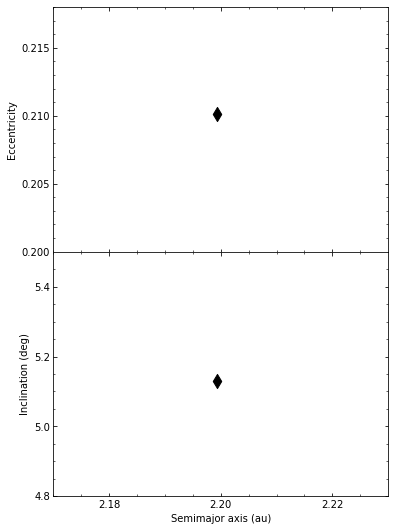

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6, 9), sharex=True)
plt.subplots_adjust(hspace=0)
ax1.minorticks_on()
ax1.tick_params(which='both', direction = 'in', top=True, right=True)
ax1.set_ylabel("Eccentricity")
ax1.set_ylim(0.2, 0.218)
ax1.set_yticks([0.2, 0.205, 0.21, 0.215])
ax2.minorticks_on()
ax2.tick_params(which='both', direction = 'in', top=True, right=True)
ax2.set_ylabel("Inclination (deg)")
ax2.set_xlabel("Semimajor axis (au)")
ax2.set_ylim(4.8, 5.5)
ax2.set_yticks([4.8, 5.0, 5.2, 5.4])
ax2.set_xlim(2.17, 2.23)
ax2.set_xticks([2.18, 2.2, 2.22])

ax1.scatter(flora_orb.a*m2au, flora_orb.e, c = 'k', marker = 'd', s = 100)
ax2.scatter(flora_orb.a*m2au, invariable_inc(sim, ps["Flora"]), c = 'k', marker = 'd', s = 100)

In [32]:
eject_vectors = [EjectionVector(100) for i in range(int(1e4))]
x, y, z = flora.xyz
vx, vy, vz = flora.vxyz
for v in eject_vectors:
    sim.add(x=x, y=y, z=z,vx=vx+v[0], vy=vy+v[1], vz=vz+v[2])

orbs = sim.calculate_orbits(primary = ps["Sun"])[9:]
p_as = [orb.a*m2au for orb in orbs]
p_es = [orb.e for orb in orbs]
p_incs = [invariable_inc(sim, p) for p in ps[10:]]

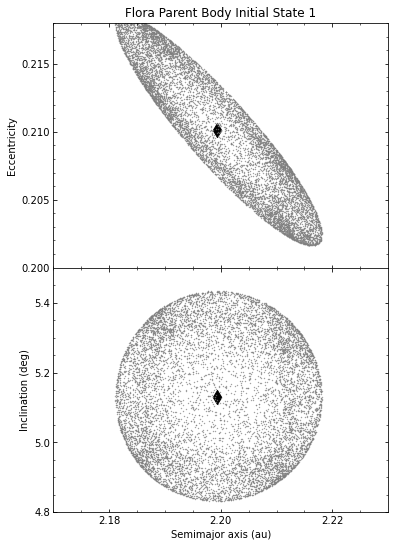

In [33]:
ax1.scatter(p_as, p_es, c = 'grey', marker = '.', s = .5)
ax2.scatter(p_as, p_incs, c = 'grey', marker = '.', s = .5)
ax1.set_title("Flora Parent Body Initial State 1")
fig

/Users/bethclark/Projects/rebound/rebound/simulation.py:505: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/bethclark/Projects/rebound/rebound/simulation.py:505: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


262.9685810830283

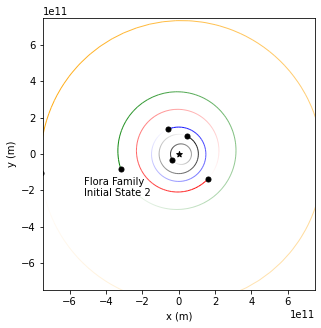

In [16]:
sim = rebound.Simulation('/Users/bethclark/Projects/Flora_Family/data/sim_inits/Flrora_Init_2.bin')
sim.move_to_com()
ps = sim.particles
xlim = pm(ps['Sun'].x, 5*au2m)
ylim = pm(ps['Sun'].y, 5*au2m)
rebound.OrbitPlot(sim, xlim=xlim, ylim=ylim, plotparticles=[1, 2, 3, 4, 5, "Flora"], color=['black', 'black', 'blue', 'red', 'orange', 'green'], unitlabel='(m)')
plt.text(ps["Flora"].x-2e11, ps["Flora"].y-1.5e11, 'Flora Family\nInitial State 2')
ps["Flora"].calculate_orbit(ps["Sun"]).f*rad2Deg

In [19]:
while ps["Flora"].calculate_orbit(ps["Sun"]).f *rad2Deg < 90 or ps["Flora"].calculate_orbit(ps["Sun"]).f *rad2Deg > 260:
    sim.integrate(sim.t + 3600)

In [20]:
flora = ps["Flora"]
flora_orb = flora.calculate_orbit(ps["Sun"])
print('f = {:.3f}, w = {:.3f}, f+w = {:.3f}'.format(abs(flora_orb.f*rad2Deg), flora_orb.omega * rad2Deg, abs(flora_orb.f*rad2Deg) + flora_orb.omega * rad2Deg
))

f = 90.003, w = 90.613, f+w = 180.616


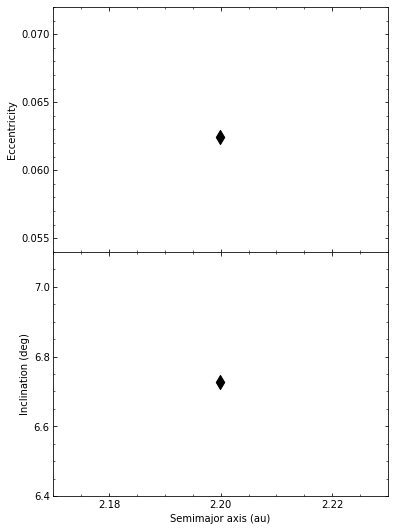

In [21]:
fig2, (ax1, ax2) = plt.subplots(2, 1, figsize = (6, 9), sharex=True)
plt.subplots_adjust(hspace=0)
ax1.minorticks_on()
ax1.tick_params(which='both', direction = 'in', top=True, right=True)
ax1.set_ylabel("Eccentricity")
ax1.set_ylim(0.054, 0.072)
ax1.set_yticks([0.055, 0.06, 0.065, 0.07])
ax2.minorticks_on()
ax2.tick_params(which='both', direction = 'in', top=True, right=True)
ax2.set_ylabel("Inclination (deg)")
ax2.set_xlabel("Semimajor axis (au)")
ax2.set_ylim(6.4, 7.1)
ax2.set_yticks([6.4, 6.6, 6.8, 7.0])
ax2.set_xlim(2.17, 2.23)
ax2.set_xticks([2.18, 2.2, 2.22])

ax1.scatter(flora_orb.a*m2au, flora_orb.e, c = 'k', marker = 'd', s = 100)
ax2.scatter(flora_orb.a*m2au, invariable_inc(sim, ps["Flora"]), c = 'k', marker = 'd', s = 100)

In [22]:
eject_vectors = [EjectionVector(100) for i in range(int(1e4))]
x, y, z = flora.xyz
vx, vy, vz = flora.vxyz
for v in eject_vectors:
    sim.add(x=x, y=y, z=z,vx=vx+v[0], vy=vy+v[1], vz=vz+v[2])

orbs = sim.calculate_orbits(primary = ps["Sun"])[9:]
p_as = [orb.a*m2au for orb in orbs]
p_es = [orb.e for orb in orbs]
p_incs = [invariable_inc(sim, p) for p in ps[10:]]

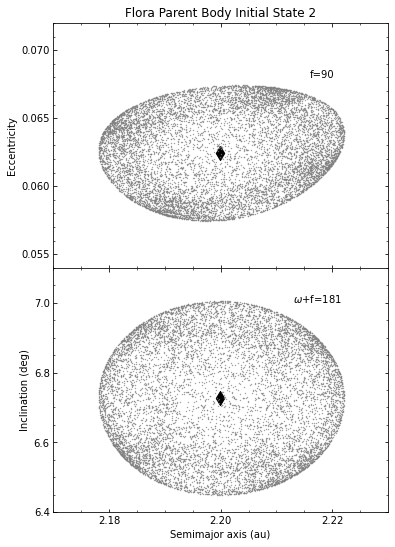

In [23]:
ax1.scatter(p_as, p_es, c = 'grey', marker = '.', s = .5)
ax2.scatter(p_as, p_incs, c = 'grey', marker = '.', s = .5)
ax1.set_title("Flora Parent Body Initial State 2")
ax1.text(2.216, 0.068, 'f={:.0f}'.format(round(abs(flora_orb.f)*rad2Deg, 0)))
ax2.text(2.213, 7, r'$\omega$+f={:.0f}'.format(round(abs(flora_orb.f)*rad2Deg, 0) + flora_orb.omega * rad2Deg))
fig2

Text(0, 0.5, 'True Anomaly ($f$)')

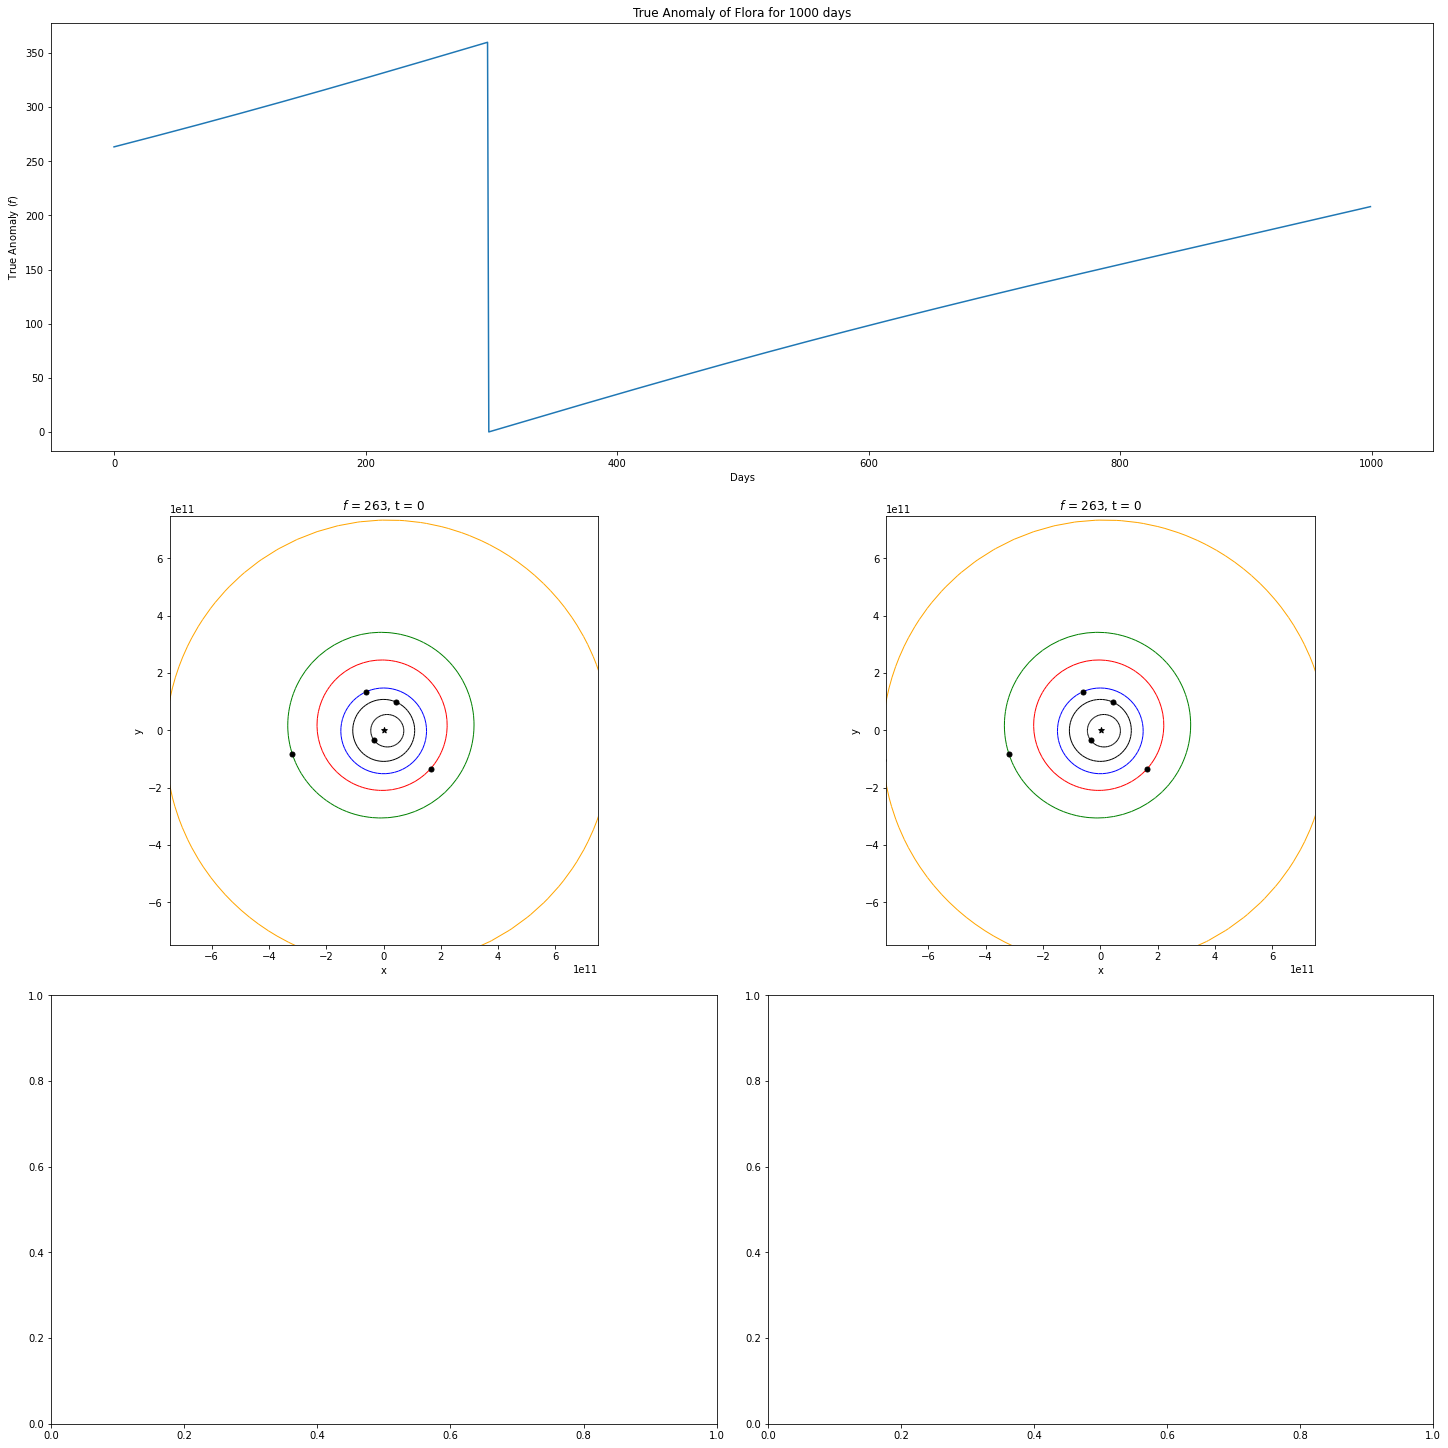

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [26]:
from src.utilities.misc import pm
sim = rebound.Simulation('/Users/bethclark/Projects/Flora_Family/data/sim_inits/Flrora_Init_2.bin')
sim.move_to_com()
ps = sim.particles
fig3 = plt.figure(constrained_layout=True, figsize = (20,20))
gs = fig3.add_gridspec(3, 2)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax2 = fig3.add_subplot(gs[1, 0])
f3_ax3 = fig3.add_subplot(gs[1, 1])
f3_ax4 = fig3.add_subplot(gs[2, 0])
f3_ax5 = fig3.add_subplot(gs[2, 1])
fs = []
q1 = q2 = q3 = q4 = False
xlim = pm(ps['Sun'].x, 5*au2m)
ylim = pm(ps['Sun'].y, 5*au2m)
for i in range(1000):
    sim.integrate(sim.t + 3600*24)
    curr_f = ps["Flora"].calculate_orbit(ps["Sun"]).f *rad2Deg
    fs.append(curr_f)
    if curr_f > -90 and not q1:
        q1 = True
        OrbitPlot(sim, ax = f3_ax2, xlim=xlim, ylim=ylim, plotparticles=[1, 2, 3, 4, 5, "Flora"], color=['black', 'black', 'blue', 'red', 'orange', 'green'], orbit_type = 'solid')
        f3_ax2.set_title('$f$ = {:.0f}, t = {}'.format(curr_f, i))
        f3_ax2.set_aspect('equal')
    if curr_f > 0 and not q2:
        q2 = True
        OrbitPlot(sim, ax = f3_ax3, xlim=xlim, ylim=ylim, plotparticles=[1, 2, 3, 4, 5, "Flora"], color=['black', 'black', 'blue', 'red', 'orange', 'green'], orbit_type = 'solid')
        f3_ax3.set_title('$f$ = {:.0f}, t = {}'.format(curr_f, i))
        f3_ax3.set_aspect('equal')
    if curr_f > -270 and curr_f < -100 and not q3:
        q3 = True
        OrbitPlot(sim, ax = f3_ax4, xlim=xlim, ylim=ylim, plotparticles=[1, 2, 3, 4, 5, "Flora"], color=['black', 'black', 'blue', 'red', 'orange', 'green'], orbit_type = 'solid')
        f3_ax4.set_title('$f$ = {:.0f}, t = {}'.format(curr_f, i))
        f3_ax4.set_aspect('equal')
    if curr_f > -180 and curr_f < -100 and not q4:
        q4 = True
        OrbitPlot(sim, ax = f3_ax5, xlim=xlim, ylim=ylim, plotparticles=[1, 2, 3, 4, 5, "Flora"], color=['black', 'black', 'blue', 'red', 'orange', 'green'], orbit_type = 'solid')
        f3_ax5.set_title('$f$ = {:.0f}, t = {}'.format(curr_f, i))
        f3_ax5.set_aspect('equal')
f3_ax1.plot(fs)
f3_ax1.set_title("True Anomaly of Flora for 1000 days")
f3_ax1.set_xlabel('Days')
f3_ax1.set_ylabel('True Anomaly ($f$)')

In [131]:
(1194*3/4)%298.5

0.0

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

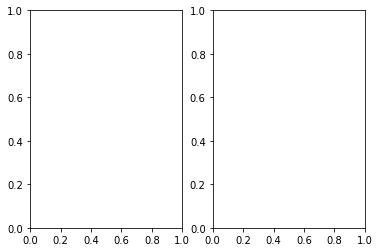

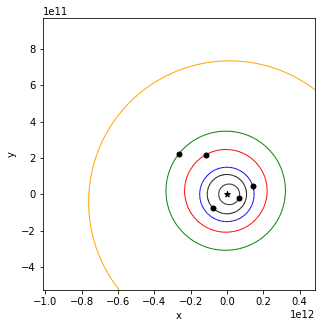

In [41]:
fig4, (tax1, tax2) = plt.subplots(1, 2)
plt.sca(tax1)
xlim = pm(ps['Flora'].x, 5*au2m)
ylim = pm(ps['Flora'].y, 5*au2m)
rebound.OrbitPlot(sim, xlim=xlim, ylim=ylim, plotparticles=[1, 2, 3, 4, 5, "Flora"], color=['black', 'black', 'blue', 'red', 'orange', 'green'])

In [25]:
import math
from rebound.particle import Particle
from itertools import cycle

def OrbitPlot(sim, figsize=None, fancy=False, slices=0, xlim=None, ylim=None, unitlabel=None, color=False, periastron=False, orbit_type="trail", lw=1., plotparticles=None, primary=None, Narc=128, ax = None):
    """
    Convenience function for plotting instantaneous orbits.

    Parameters
    ----------
    sim             : Simulation
    figsize         : tuple of float, optional
        Tuple defining the figure size (default: (5,5))
    fancy           : bool (default: False)
        Changes various settings to create a fancy looking plot
    slices          : float, optional
        Default is 0, showing the orbits in the xy plane only. Set to a value between 0 and 1 to create three plots, showing the orbits from different directions. The value corresponds to the size of the additional plots relative to the main plot.
    xlim            : tuple of float, optional           
        Limits for x axes (default: None = automatically determined)
    ylim            : tuple of float, optional           
        Limits for y axes (default: None = automatically determined)
    unitlabel       : str, optional          
        String describing the units, shown on axis labels (default: None)
    color           : bool, str or list, optional            
        By default plots are black and white. If set to True, plots use a color cycle. If a string or list of strings, e.g. ['red', 'cyan'], will cycle between passed colors.
    periastron  : bool, optional            
        Draw a marker at periastron (default: False)
    orbit_type       : str, optional
        This argument determines the type of orbit show. By default, it shows the orbit as a trailing and fading line ("trail"). Other object are: "solid", None.
    lw              : float, optional           
        Linewidth used in plots (default: 1.)
    plotparticles   : list, optional
        List of particles to plot. Can be a list of any valid keys for accessing sim.particles, i.e., integer indices or hashes (default: plot all particles)
    primary         : rebound.Particle, optional
        Primary to use for the osculating orbit (default: Jacobi center of mass)
    Narc            : int, optional
        Number of points used in an orbit. Increase this number for highly eccentric orbits. (default: 128)

    Returns
    -------
    fig, ax_main, (ax_top, ax_right)
        The function return the matplotlib figure as well as the axes (three axes if slices>0.)

    Examples
    --------
    The following example illustrates a typical use case.

    >>> sim = rebound.Simulation()
    >>> sim.add(m=1)
    >>> sim.add(a=1)
    >>> fig, ax_main = rebound.OrbitPlot(sim)
    >>> fig.savefig("image.png") # save figure to file
    >>> fig.show() # show figure on screen

    """
    try:
        import matplotlib.pyplot as plt
        from matplotlib import gridspec
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        import numpy as np
    except:
        raise ImportError("Error importing matplotlib and/or numpy. Plotting functions not available. If running from within a jupyter notebook, try calling '%matplotlib inline' beforehand.")
    if not plotparticles:
        plotparticles = []
    if unitlabel is not None:
        unitlabel = " " + unitlabel
    else:
        unitlabel = ""
    if figsize is None:
        if slices>0.:
            figsize = (8,8)
        else:
            figsize = (5,5)
    
    fig = plt.figure(figsize=figsize)
    if slices > 0 or ax == None:
        ax_main = plt.subplot(111,aspect="equal")
    else:
        ax_main = ax
    ax_main.set_xlabel("x"+unitlabel)
    ax_main.set_ylabel("y"+unitlabel)

    if slices>0.:
        divider = make_axes_locatable(ax_main)
        divider.set_aspect(True)
        ax_top   = divider.append_axes("top",  size="%.2f%%"%(100.*slices), sharex=ax_main, pad=0)
        ax_top.set_aspect('equal', adjustable='datalim')
        ax_right = divider.append_axes("right", size="%.2f%%"%(100.*slices), sharey=ax_main, pad=0)
        ax_right.set_aspect('equal', adjustable='datalim')
      
        plt.setp(ax_top.get_xticklabels(), visible=False)
        plt.setp(ax_top.get_xticklines(), visible=False)
        ax_top.set_ylabel("z"+unitlabel)
        
        plt.setp(ax_right.get_yticklabels(), visible=False)
        plt.setp(ax_right.get_yticklines(), visible=False)
        ax_right.set_xlabel("z"+unitlabel)

    OrbitPlotOneSlice(sim, ax_main, Narc=Narc, color=color, periastron=periastron, orbit_type=orbit_type, lw=lw, axes="xy",fancy=fancy, plotparticles=plotparticles, primary=primary, xlim=xlim, ylim=ylim)

    if slices>0.:
        OrbitPlotOneSlice(sim, ax_right, Narc=Narc, color=color, periastron=periastron, orbit_type=orbit_type, lw=lw,fancy=fancy, axes="zy", plotparticles=plotparticles, primary=primary)
        OrbitPlotOneSlice(sim, ax_top, Narc=Narc, color=color, periastron=periastron, orbit_type=orbit_type, lw=lw,fancy=fancy, axes="xz", plotparticles=plotparticles, primary=primary)

    if fancy:
        ax_main.apply_aspect()
        if slices>0.:
            ax_top.apply_aspect()
            ax_right.apply_aspect()
        ax_main.autoscale(False)
        if slices>0.:
            ax_top.autoscale(False)
            ax_right.autoscale(False)
        OrbitPlotAddFancyStars(ax_main,lw)
        if slices>0.:
            OrbitPlotAddFancyStars(ax_top,lw,slices)
            OrbitPlotAddFancyStars(ax_right,lw,slices)
    if slices>0.:
        return fig, ax_main, ax_top, ax_right
    else:
        return fig, ax_main

def get_color(color):
    """
    Takes a string for a color name defined in matplotlib and returns of a 3-tuple of RGB values.
    Will simply return passed value if it's a tuple of length three.

    Parameters
    ----------
    color   : str
        Name of matplotlib color to calculate RGB values for.
    """

    if isinstance(color, tuple) and len(color) == 3: # already a tuple of RGB values
        return color

    try:
        import matplotlib.colors as mplcolors
    except:
        raise ImportError("Error importing matplotlib. If running from within a jupyter notebook, try calling '%matplotlib inline' beforehand.")
   
    try:
        hexcolor = mplcolors.cnames[color]
    except KeyError:
        raise AttributeError("Color not recognized in matplotlib.")

    hexcolor = hexcolor.lstrip('#')
    lv = len(hexcolor)
    return tuple(int(hexcolor[i:i + lv // 3], 16)/255. for i in range(0, lv, lv // 3)) # tuple of rgb values

def fading_line(x, y, color='black', alpha=1, fading=True, fancy=False, **kwargs):
    """
    Returns a matplotlib LineCollection connecting the points in the x and y lists.
    Can pass any kwargs you can pass to LineCollection, like linewidgth.

    Parameters
    ----------
    x       : list or array of floats for the positions on the (plot's) x axis.
    y       : list or array of floats for the positions on the (plot's) y axis.
    color   : Color for the line. 3-tuple of RGB values, hex, or string. Default: 'black'.
    alpha   : float, alpha value of the line. Default 1.
    fading  : bool, determines if the line is fading along the orbit.
    fancy   : bool, same as fancy argument in OrbitPlot()
    """
    try:
        from matplotlib.collections import LineCollection
        import numpy as np
    except:
        raise ImportError("Error importing matplotlib and/or numpy. Plotting functions not available. If running from within a jupyter notebook, try calling '%matplotlib inline' beforehand.")


    if "lw" not in kwargs:
        kwargs["lw"] = 1
    lw = kwargs["lw"]

    if fancy:
        kwargs["lw"] = 1*lw
        fl1 = fading_line(x, y, color=color, alpha=alpha, fading=fading, fancy=False, **kwargs)
        kwargs["lw"] = 2*lw
        alpha *= 0.5
        fl2 = fading_line(x, y, color=color, alpha=alpha, fading=fading, fancy=False, **kwargs)
        kwargs["lw"] = 6*lw
        alpha *= 0.5
        fl3 = fading_line(x, y, color=color, alpha=alpha, fading=fading, fancy=False, **kwargs)
        return [fl3,fl2,fl1]
    
    Npts = len(x)
    if len(y) != Npts:
        raise AttributeError("x and y must have same dimension.")
    
    color = get_color(color)
    colors = np.zeros((Npts,4))
    colors[:,0:3] = color
    if fading:
        colors[:,3] = alpha*np.linspace(0,1,Npts)
    else:
        colors[:,3] = alpha
   
    segments = np.zeros((Npts-1,2,2))
    segments[:,0,0] = x[:-1]
    segments[:,0,1] = y[:-1]
    segments[:,1,0] = x[1:]
    segments[:,1,1] = y[1:]

    lc = LineCollection(segments, color=colors, **kwargs)
    return lc

def OrbitPlotOneSlice(sim, ax, Narc=128, color=False, periastron=False, orbit_type="trial", lw=1., axes="xy", plotparticles=None, primary=None, fancy=False, xlim=None, ylim=None):
    import matplotlib.pyplot as plt
    from matplotlib.collections import LineCollection
    import numpy as np
    import random

    if not plotparticles:
        plotparticles = []
    #ax.set_aspect("equal")
    p_orb_pairs = []
    if not plotparticles:
        plotparticles = range(1, sim.N_real)
    for i in plotparticles:
        p = sim.particles[i]
        p_orb_pairs.append((p, p.calculate_orbit(primary=primary)))


    if color:
        if color == True:
            colors = [(1.,0.,0.),(0.,0.75,0.75),(0.75,0.,0.75),(0.75, 0.75, 0,),(0., 0., 0.),(0., 0., 1.),(0., 0.5, 0.)]
        if isinstance(color, str):
            colors = [get_color(color)]
        if isinstance(color, list):
            colors = []
            for c in color:
                colors.append(get_color(c))
    else:
        if fancy:
            colors = [(181./206.,66./206.,191./206.)]
        else:
            colors = ["black"]
    coloriterator = cycle(colors)

    coords = {'x':0, 'y':1, 'z':2}
    axis0 = coords[axes[0]]
    axis1 = coords[axes[1]]
   
    prim = sim.particles[0] if primary is None else primary 
    if fancy:
        sun = (256./256.,256./256.,190./256.)
        opa = 0.035
        size = 6000.
        for i in range(100):
            ax.scatter(getattr(prim,axes[0]),getattr(prim,axes[1]), alpha=opa, s=size*lw, facecolor=sun, edgecolor=None, zorder=3)
            size *= 0.95
        ax.scatter(getattr(prim,axes[0]),getattr(prim,axes[1]), s=size*lw, facecolor=sun, edgecolor=None, zorder=3)
    else:
        ax.scatter(getattr(prim,axes[0]),getattr(prim,axes[1]), marker="*", s=35*lw, facecolor="black", edgecolor=None, zorder=3)
    
    proj = {}
    
    xmin = []
    xmax = []
    ymin = []
    ymax = []
    for p, o in p_orb_pairs:
        prim = p.jacobi_com if primary is None else primary 
        for _p in [p,prim]:
            xmax.append(_p.xyz[axis0])
            xmin.append(_p.xyz[axis0])
            ymax.append(_p.xyz[axis1])
            ymin.append(_p.xyz[axis1])

        colori = next(coloriterator)

        if fancy:
            ax.scatter(getattr(p,axes[0]), getattr(p,axes[1]), s=25*lw, facecolor=colori, edgecolor=None, zorder=3)
        else:
            ax.scatter(getattr(p,axes[0]), getattr(p,axes[1]), s=25*lw, facecolor="black", edgecolor=None, zorder=3)
       
        if orbit_type is not None:
            pts = np.array(p.sample_orbit(Npts=Narc+1, primary=prim))
            proj['x'],proj['y'],proj['z'] = [pts[:,i] for i in range(3)]

            # Estimate limits
            if o.a < 0.: # hyperbolic
                xmax.append(p.xyz[axis0])
                xmin.append(p.xyz[axis0])
                ymax.append(p.xyz[axis1])
                ymin.append(p.xyz[axis1])
            else: # circular
                xmax.append(max(proj[axes[0]]))
                xmin.append(min(proj[axes[0]]))
                ymax.append(max(proj[axes[1]]))
                ymin.append(min(proj[axes[1]]))
            
            if orbit_type=="trail":
                fading = True
            elif orbit_type=="solid":
                fading = False
            else:
                raise ValueError("Unknown orbit_type.")
            lc = fading_line(proj[axes[0]], proj[axes[1]], color=colori, lw=lw, fancy=fancy, fading=fading)
            if type(lc) is list:
                for l in lc:
                    ax.add_collection(l)
            else:
                ax.add_collection(lc)

        if periastron:
            newp = Particle(a=o.a, f=0., inc=o.inc, omega=o.omega, Omega=o.Omega, e=o.e, m=p.m, primary=prim, simulation=sim)
            ax.plot([getattr(prim,axes[0]), getattr(newp,axes[0])], [getattr(prim,axes[1]), getattr(newp,axes[1])], linestyle="dotted", c=colori, zorder=1, lw=lw)
            ax.scatter([getattr(newp,axes[0])],[getattr(newp,axes[1])], marker="o", s=5.*lw, facecolor="none", edgecolor=colori, zorder=1)

    if xmax:
        xmax = max(xmax)
        xmin = min(xmin)
        width = xmax-xmin
        ymax = max(ymax)
        ymin = min(ymin)
        height = ymax-ymin
    
        # prevent overly elongated plots
        ymin -= width/10.
        ymax += width/10.
        
        xmin -= height/10.
        xmax += height/10.

    if xlim is not None:
        ax.set_xlim(xlim)
    elif xmax:
        ax.set_xlim([xmin-0.05*width,xmax+0.05*width])
    if ylim is not None:
        ax.set_ylim(ylim)
    elif xmax:
        ax.set_ylim([ymin-0.05*height,ymax+0.05*height])



def OrbitPlotAddFancyStars(ax,lw,slices=1.):
    import numpy as np
    # safe the current random seed to restore later
    os = np.random.get_state()
    # always produce the same stars
    np.random.seed(1) 

    ax.set_facecolor((0.,0.,0.))
    for pos in ['top', 'bottom', 'right', 'left']:
        ax.spines[pos].set_edgecolor((0.3,0.3,0.3))
    
    starcolor = (1.,1.,1.)
    starsurfacedensity = 0.8

    area = np.sqrt(np.sum(np.square(ax.transAxes.transform([1.,1.]) - ax.transAxes.transform([0.,0.]))))*slices
    nstars = int(starsurfacedensity*area)

    #small stars
    xy = np.random.uniform(size=(nstars,2))
    ax.scatter(xy[:,0],xy[:,1], transform=ax.transAxes, alpha=0.05, s=8*lw, facecolor=starcolor, edgecolor=None, zorder=3)
    ax.scatter(xy[:,0],xy[:,1], transform=ax.transAxes, alpha=0.1, s=4*lw, facecolor=starcolor, edgecolor=None, zorder=3)
    ax.scatter(xy[:,0],xy[:,1], transform=ax.transAxes, alpha=0.2, s=0.5*lw, facecolor=starcolor, edgecolor=None, zorder=3)
    
    #large stars
    xy = np.random.uniform(size=(nstars//4,2))
    ax.scatter(xy[:,0],xy[:,1], transform=ax.transAxes, alpha=0.1, s=15*lw, facecolor=starcolor, edgecolor=None, zorder=3)
    ax.scatter(xy[:,0],xy[:,1], transform=ax.transAxes, alpha=0.1, s=5*lw, facecolor=starcolor, edgecolor=None, zorder=3)
    ax.scatter(xy[:,0],xy[:,1], transform=ax.transAxes, alpha=0.5, s=2*lw, facecolor=starcolor, edgecolor=None, zorder=3)

    np.random.set_state(os)



